In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
print(len(x_train[0][0][0]))

TypeError: object of type 'numpy.float32' has no len()

# CNN model using 3*3 Kernel 

In [2]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.2630 - acc: 0.9196 - val_loss: 0.0573 - val_acc: 0.9806
Epoch 2/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0895 - acc: 0.9738 - val_loss: 0.0446 - val_acc: 0.9853
Epoch 3/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0657 - acc: 0.9808 - val_loss: 0.0393 - val_acc: 0.9868
Epoch 4/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0553 - acc: 0.9833 - val_loss: 0.0320 - val_acc: 0.9887
Epoch 5/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0448 - acc: 0.9865 - val_loss: 0.0321 - val_acc: 0.9891
Epoch 6/12
60000/60000 [=

['loss', 'acc']
[0.024997417646748, 0.9927]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


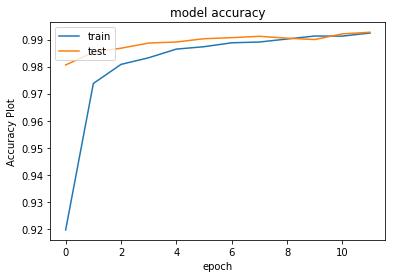

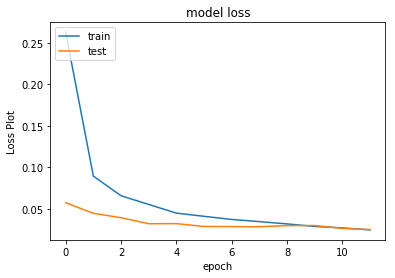

In [7]:
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
print(model.metrics_names)
print(score)
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy Plot')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss Plot')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CNN model using 2*2 Kernel 

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 136s 2ms/step - loss: 0.3207 - acc: 0.9023 - val_loss: 0.0749 - val_acc: 0.9764
Epoch 2/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.1181 - acc: 0.9646 - val_loss: 0.0541 - val_acc: 0.9829
Epoch 3/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0894 - acc: 0.9735 - val_loss: 0.0431 - val_acc: 0.9856
Epoch 4/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0732 - acc: 0.9778 - val_loss: 0.0481 - val_acc: 0.9848
Epoch 5/12
60000/60000 [==============================] - 137s 2ms/step - loss: 0.0640 - acc: 0.9810 - val_loss: 0.0442 - val_acc: 0.9854
Epoch 6/12
60000/60000 [==============================] - 137s 2ms/step - loss: 0.0569 - acc: 0.9829 - val_loss: 0.0377 - val_acc: 0.9874
Epoch 7/12
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0529 - acc: 0.9839 - val_loss: 0.0383 - 

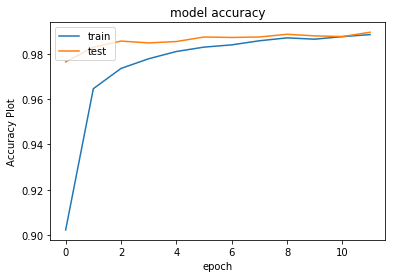

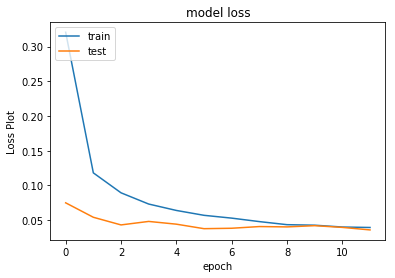

In [12]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy Plot')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss Plot')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CNN model using 5*5 Kernel 

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 249s 4ms/step - loss: 0.2305 - acc: 0.9294 - val_loss: 0.0489 - val_acc: 0.9854
Epoch 2/12
60000/60000 [==============================] - 248s 4ms/step - loss: 0.0776 - acc: 0.9767 - val_loss: 0.0351 - val_acc: 0.9886
Epoch 3/12
60000/60000 [==============================] - 249s 4ms/step - loss: 0.0587 - acc: 0.9827 - val_loss: 0.0312 - val_acc: 0.9897
Epoch 4/12
60000/60000 [==============================] - 248s 4ms/step - loss: 0.0471 - acc: 0.9864 - val_loss: 0.0235 - val_acc: 0.9917
Epoch 5/12
60000/60000 [==============================] - 249s 4ms/step - loss: 0.0396 - acc: 0.9888 - val_loss: 0.0228 - val_acc: 0.9922
Epoch 6/12
60000/60000 [==============================] - 249s 4ms/step - loss: 0.0347 - acc: 0.9895 - val_loss: 0.0221 - val_acc: 0.9924
Epoch 7/12
60000/60000 [==============================] - 248s 4ms/step - loss: 0.0307 - acc: 0.9909 - val_loss: 0.0238 - 

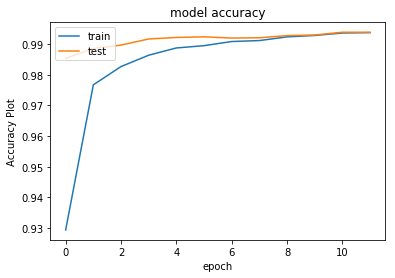

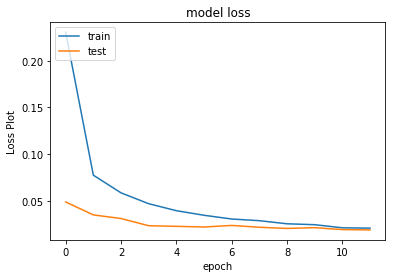

In [14]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy Plot')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss Plot')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CNN model using 3 layers and 3*3 Kernel size 

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Conv2D(128, (3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 244s 4ms/step - loss: 0.2560 - acc: 0.9181 - val_loss: 0.0637 - val_acc: 0.9791
Epoch 2/12
60000/60000 [==============================] - 244s 4ms/step - loss: 0.0749 - acc: 0.9764 - val_loss: 0.0326 - val_acc: 0.9893
Epoch 3/12
60000/60000 [==============================] - 244s 4ms/step - loss: 0.0578 - acc: 0.9820 - val_loss: 0.0251 - val_acc: 0.9918
Epoch 4/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0470 - acc: 0.9856 - val_loss: 0.0234 - val_acc: 0.9914
Epoch 5/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0417 - acc: 0.9870 - val_loss: 0.0202 - val_acc: 0.9926
Epoch 6/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0364 - acc: 0.9888 - val_loss: 0.0197 - val_acc: 0.9930
Epoch 7/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0343 - acc: 0.9898 - val_loss: 0.0195 - 

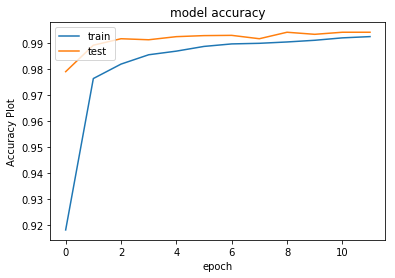

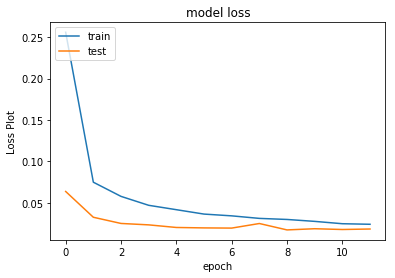

In [18]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy Plot')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss Plot')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CNN model using 5 layers and 5*5 Kernel size 

In [3]:
model = Sequential()
print(input_shape)
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# print(input_shape)
model.add(Conv2D(64, (5, 5),
                 activation='relu', padding = 'same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.50))

model.add(Conv2D(128, (5, 5),
                 activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
# Dense is used to make Fully connected layer between previous and next layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(28, 28, 1)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 376s 6ms/step - loss: 0.1853 - acc: 0.9441 - val_loss: 0.0692 - val_acc: 0.9814
Epoch 2/12
60000/60000 [==============================] - 374s 6ms/step - loss: 0.0718 - acc: 0.9800 - val_loss: 0.0476 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 375s 6ms/step - loss: 0.0554 - acc: 0.9848 - val_loss: 0.0386 - val_acc: 0.9893
Epoch 4/12
60000/60000 [==============================] - 375s 6ms/step - loss: 0.0483 - acc: 0.9868 - val_loss: 0.0449 - val_acc: 0.9875
Epoch 5/12
60000/60000 [==============================] - 377s 6ms/step - loss: 0.0431 - acc: 0.9884 - val_loss: 0.0282 - val_acc: 0.9924
Epoch 6/12
60

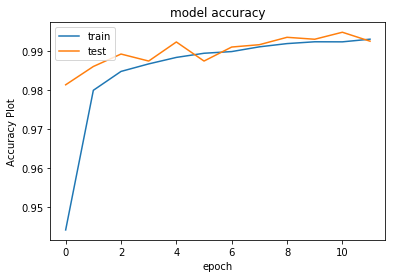

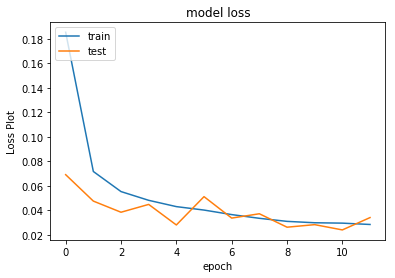

In [5]:
import matplotlib.pyplot as plt
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy Plot')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss Plot')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CNN model using 7 layers and 2*2 Kernel size 

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.50))

model.add(Conv2D(128, (2, 2),
                 activation='relu'))
model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256, (3, 3),
                 activation='relu', padding = 'same'))
# model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.30))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 229s 4ms/step - loss: 0.2606 - acc: 0.9229 - val_loss: 0.0745 - val_acc: 0.9800
Epoch 2/12
60000/60000 [==============================] - 226s 4ms/step - loss: 0.0853 - acc: 0.9748 - val_loss: 0.0494 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 226s 4ms/step - loss: 0.0596 - acc: 0.9817 - val_loss: 0.0455 - val_acc: 0.9868
Epoch 4/12
60000/60000 [==============================] - 226s 4ms/step - loss: 0.0477 - acc: 0.9854 - val_loss: 0.0319 - val_acc: 0.9899
Epoch 5/12
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0388 - acc: 0.9876 - val_loss: 0.0341 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 229s 4ms/step - loss: 0.0355 - acc: 0.9890 - val_loss: 0.0254 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 229s 4ms/step - loss: 0.0323 - acc: 0.9902 - val_loss: 0.0222 - 

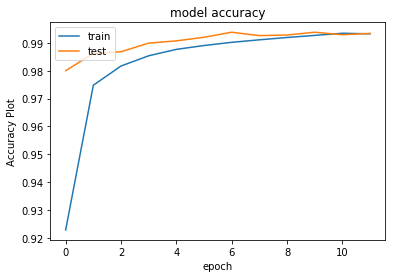

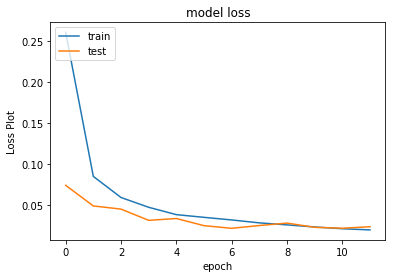

In [7]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy Plot')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss Plot')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Train Accuracy", "Test Accuracy"]

x.add_row(["CNN model using 2*2 Kernel", 0.9885, 0.9895])
x.add_row(["CNN model using 3*3 Kernel", 0.9924, 0.9827])
x.add_row(["CNN model using 5*5 Kernel", 0.9938, 0.9939])
x.add_row(["CNN model using 3 layers and 3*3 Kernel size", 0.9926, 0.9943])
x.add_row(["CNN model using 5 layers and 5*5 Kernel size", 0.9931, 0.9926])
x.add_row(["CNN model using 7 layers and 2*2 Kernel size", 0.9932, 0.9934])

print(x.get_string(title="Multiple CNN Model"),'\n')

+----------------------------------------------+----------------+---------------+
|                    Model                     | Train Accuracy | Test Accuracy |
+----------------------------------------------+----------------+---------------+
|          CNN model using 2*2 Kernel          |     0.9885     |     0.9895    |
|          CNN model using 3*3 Kernel          |     0.9924     |     0.9827    |
|          CNN model using 5*5 Kernel          |     0.9938     |     0.9939    |
| CNN model using 3 layers and 3*3 Kernel size |     0.9926     |     0.9943    |
| CNN model using 5 layers and 5*5 Kernel size |     0.9931     |     0.9926    |
| CNN model using 7 layers and 2*2 Kernel size |     0.9932     |     0.9934    |
+----------------------------------------------+----------------+---------------+ 

